In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 경로 설정
data_dir = 'C:\\Users\\intel\\Downloads\\dataset'

# 데이터 증강 및 스케일링
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 70% 훈련, 30% 검증+테스트
)

# 데이터 제너레이터 설정
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 70% 훈련 세트
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 30% 검증+테스트 세트
)

Found 54209 images belonging to 100 classes.
Found 23164 images belonging to 100 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100개의 버섯 종류 분류
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/20
1694/1694 [==============================] - 740s 434ms/step - loss: 3.7642 - accuracy: 0.1623 - val_loss: 3.2519 - val_accuracy: 0.2306
Epoch 2/20
1694/1694 [==============================] - 389s 229ms/step - loss: 3.1453 - accuracy: 0.2613 - val_loss: 2.8875 - val_accuracy: 0.3030
Epoch 3/20
1694/1694 [==============================] - 387s 228ms/step - loss: 2.8797 - accuracy: 0.3029 - val_loss: 2.5890 - val_accuracy: 0.3506
Epoch 4/20
1694/1694 [==============================] - 385s 227ms/step - loss: 2.7191 - accuracy: 0.3300 - val_loss: 2.4724 - val_accuracy: 0.3779
Epoch 5/20
1694/1694 [==============================] - 392s 232ms/step - loss: 2.6140 - accuracy: 0.3490 - val_loss: 2.3826 - val_accuracy: 0.3947
Epoch 6/20
1694/1694 [==============================] - 391s 231ms/step - loss: 2.5433 - accuracy: 0.3649 - val_loss: 2.3577 - val_accuracy: 0.3934
Epoch 7/20
1694/1694 [==============================] - 379s 224ms/step - loss: 2.4870 - accuracy: 0.3733 - val_

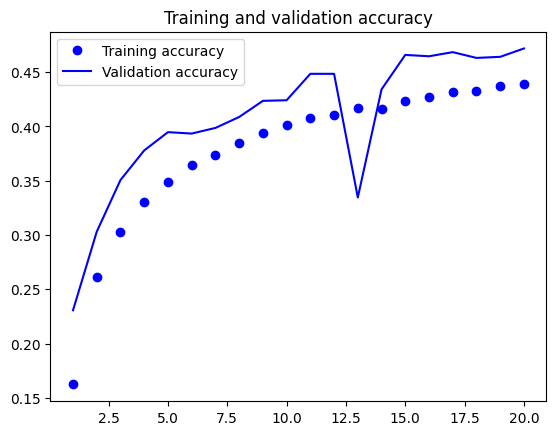

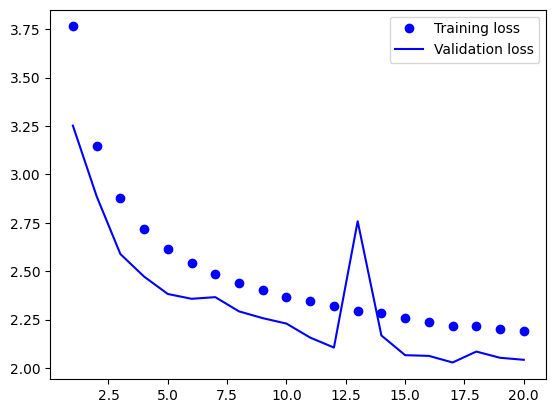

In [7]:
# 시각화
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()